<a target="_blank" href="https://medium.com/@hasan.mhowwala/introduction-a7ad6a7fc30e"><img src="https://github-readme-medium-recent-article.vercel.app/medium/@username/index" alt="Medium Article">

In [3]:
import pandas as pd

# Load the data from the CSV files
edges_df = pd.read_csv('/content/expanded_edges.csv')
products_df = pd.read_csv('/content/expanded_products.csv')

# Display basic information and the first few rows of each dataset
edges_info = edges_df.info()
products_info = products_df.info()
edges_head = edges_df.head()
products_head = products_df.head()

edges_info, products_info, edges_head, products_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ProductID_1  100 non-null    int64
 1   ProductID_2  100 non-null    int64
 2   Frequency    100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    100 non-null    int64 
 1   ProductName  100 non-null    object
 2   Category     100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


(None,
 None,
    ProductID_1  ProductID_2  Frequency
 0           69           84         38
 1           84           61         63
 2           61           41         64
 3           41           49         16
 4           49           97         65,
    ProductID ProductName  Category
 0          1  Product_A0    Beauty
 1          2  Product_B1      Toys
 2          3  Product_C2    Health
 3          4  Product_D3  Clothing
 4          5  Product_E4      Home)

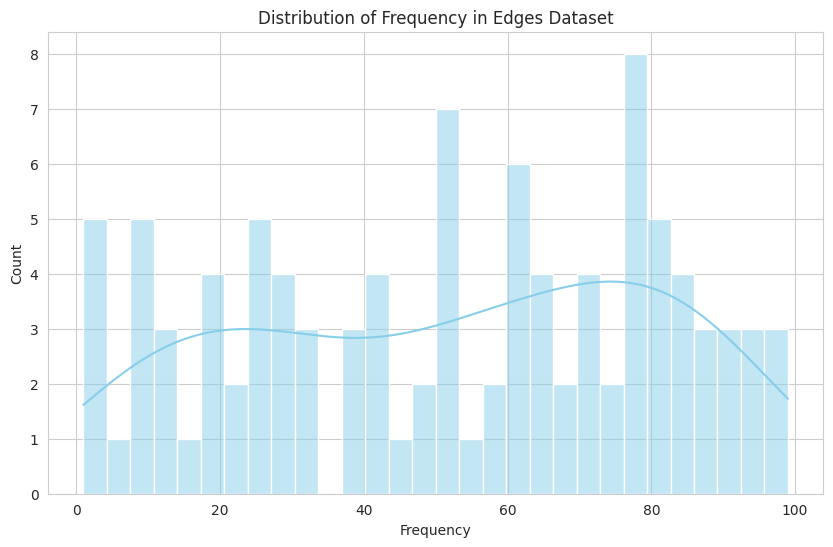

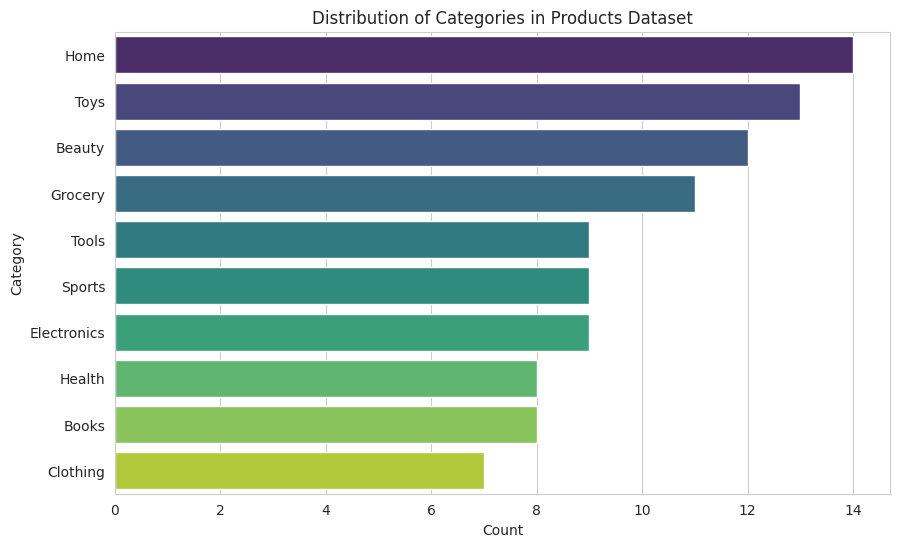

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Visualizing the distribution of `Frequency` in the edges dataset
plt.figure(figsize=(10, 6))
sns.histplot(edges_df['Frequency'], bins=30, kde=True, color="skyblue")
plt.title('Distribution of Frequency in Edges Dataset')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# 2. Analyzing the distribution of `Category` in the products dataset
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=products_df, order=products_df['Category'].value_counts().index, palette="viridis")
plt.title('Distribution of Categories in Products Dataset')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [5]:
# Checking for duplicates in both datasets
edges_duplicates = edges_df.duplicated().sum()
products_duplicates = products_df.duplicated().sum()

# Checking for outliers in the `Frequency` column in the edges dataset
Q1 = edges_df['Frequency'].quantile(0.25)
Q3 = edges_df['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = edges_df[(edges_df['Frequency'] < lower_bound) | (edges_df['Frequency'] > upper_bound)].shape[0]

# Displaying the results
edges_duplicates, products_duplicates, outliers

(0, 0, 0)

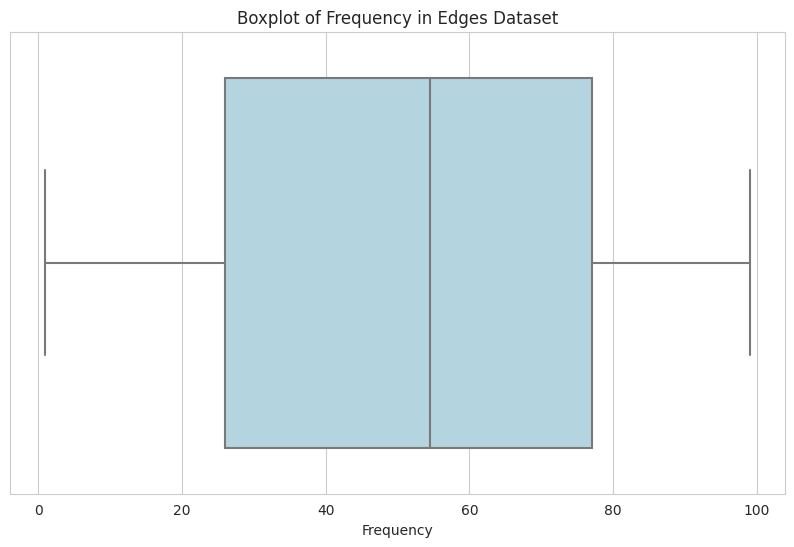

In [6]:
# Visualizing the outliers in the `Frequency` column using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Frequency', data=edges_df, color="lightblue")
plt.title('Boxplot of Frequency in Edges Dataset')
plt.xlabel('Frequency')
plt.show()

In [7]:
# Merging the datasets to include product details in the edges dataset
merged_df = edges_df.merge(products_df, left_on='ProductID_1', right_on='ProductID', how='left')
merged_df = merged_df.merge(products_df, left_on='ProductID_2', right_on='ProductID', how='left', suffixes=('_1', '_2'))

# Dropping redundant columns
merged_df.drop(columns=['ProductID_1', 'ProductID_2'], inplace=True)

# Displaying the merged dataset
merged_df.head()

<ipython-input-7-5bcfce263773>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ProductID_1'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(products_df, left_on='ProductID_2', right_on='ProductID', how='left', suffixes=('_1', '_2'))


,Frequency,ProductName_1,Category_1,ProductName_2,Category_2
0,38,Product_Q68,Beauty,Product_F83,Sports
1,63,Product_F83,Sports,Product_I60,Sports
2,64,Product_I60,Sports,Product_O40,Home
3,16,Product_O40,Home,Product_W48,Grocery
4,65,Product_W48,Grocery,Product_S96,Tools


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initializing the label encoder
label_encoder = LabelEncoder()

# Encoding the 'Category_1' and 'Category_2' columns
merged_df['Category_1_Encoded'] = label_encoder.fit_transform(merged_df['Category_1'])
merged_df['Category_2_Encoded'] = label_encoder.fit_transform(merged_df['Category_2'])

# Displaying the updated dataset with encoded columns
merged_df.head()

,Frequency,ProductName_1,Category_1,ProductName_2,Category_2,Category_1_Encoded,Category_2_Encoded
0,38,Product_Q68,Beauty,Product_F83,Sports,0,7
1,63,Product_F83,Sports,Product_I60,Sports,7,7
2,64,Product_I60,Sports,Product_O40,Home,7,6
3,16,Product_O40,Home,Product_W48,Grocery,6,4
4,65,Product_W48,Grocery,Product_S96,Tools,4,8


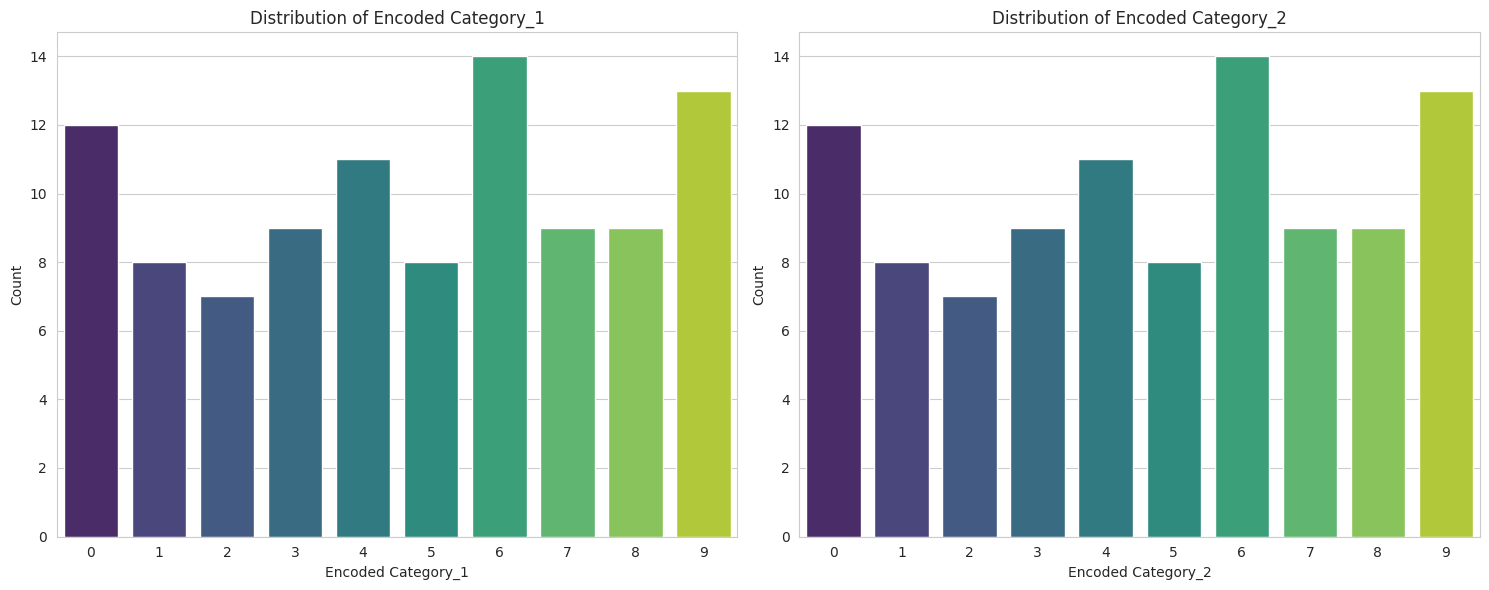

In [9]:
# Visualizing the distribution of the encoded categories
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Distribution of Category_1_Encoded
sns.countplot(x='Category_1_Encoded', data=merged_df, ax=axs[0], palette="viridis")
axs[0].set_title('Distribution of Encoded Category_1')
axs[0].set_xlabel('Encoded Category_1')
axs[0].set_ylabel('Count')

# Distribution of Category_2_Encoded
sns.countplot(x='Category_2_Encoded', data=merged_df, ax=axs[1], palette="viridis")
axs[1].set_title('Distribution of Encoded Category_2')
axs[1].set_xlabel('Encoded Category_2')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing the data
X = merged_df[['Category_1_Encoded', 'Category_2_Encoded']]
y = merged_df['Frequency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Training the models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Making predictions
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculating RMSE and R2 scores
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

lr_r2 = r2_score(y_test, lr_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

lr_rmse, lr_r2, dt_rmse, dt_r2, rf_rmse, rf_r2

(27.50903436292107,
 -0.01450472275170478,
 45.67014889399858,
 -1.7962000328450154,
 36.07003071990267,
 -0.7442004968776756)

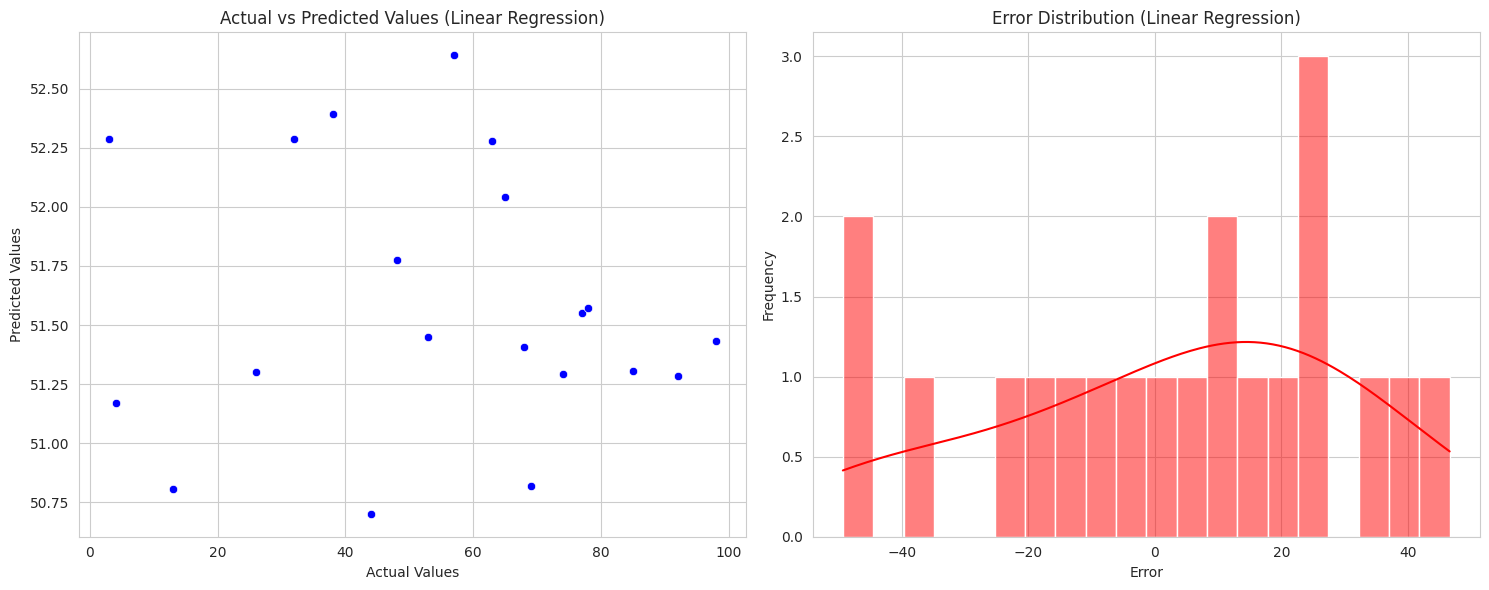

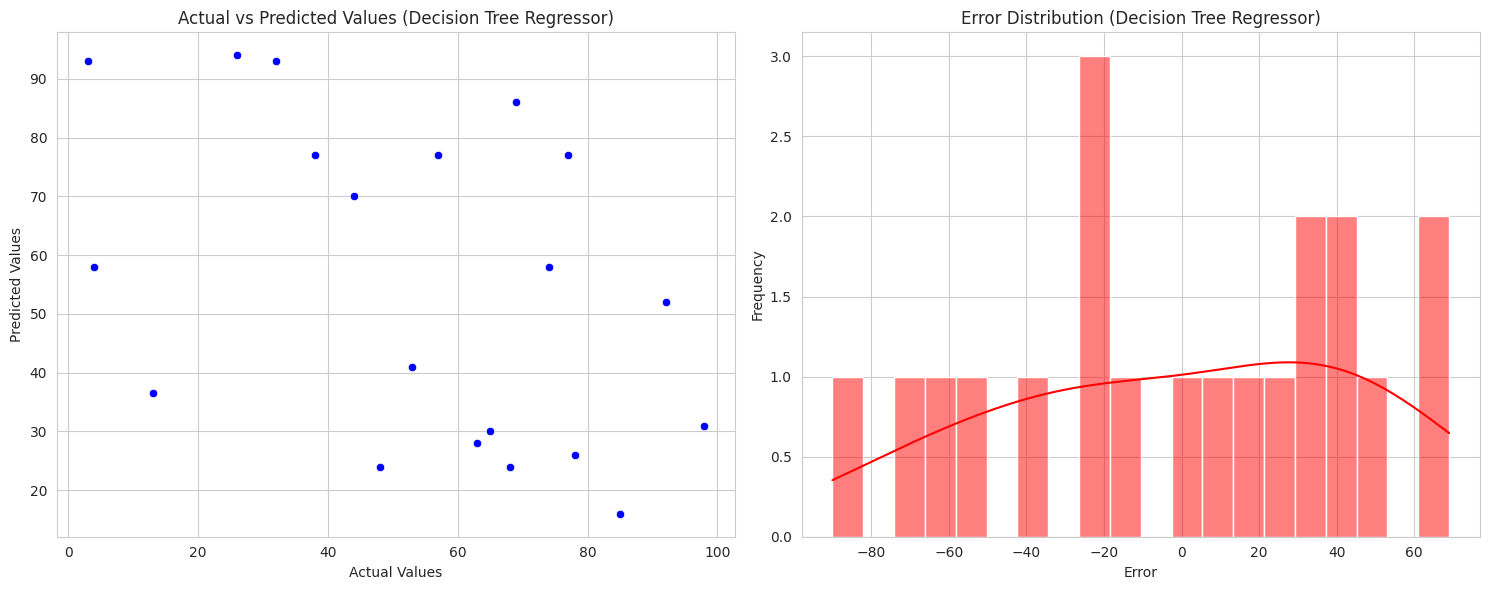

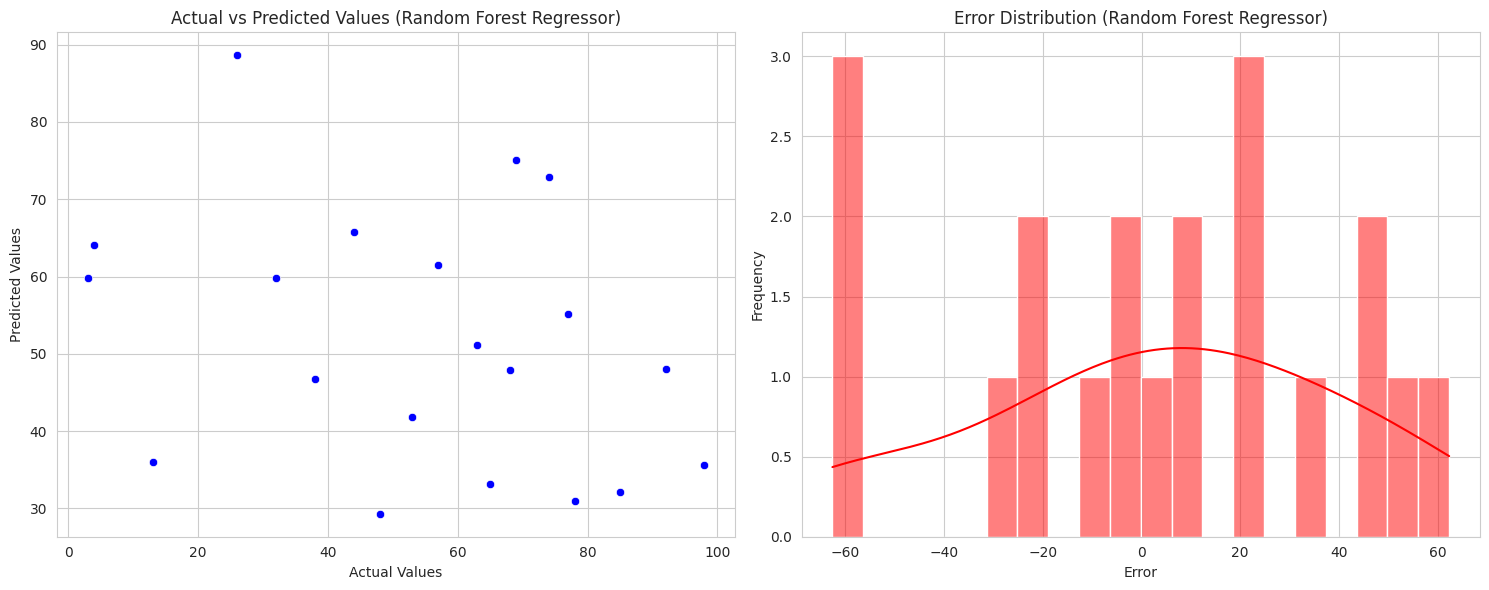

In [11]:
# Function to create plots for actual vs predicted values and error distribution
def plot_results(y_true, y_pred, model_name):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Actual vs Predicted values
    sns.scatterplot(x=y_true, y=y_pred, ax=axs[0], color="blue")
    axs[0].set_title(f'Actual vs Predicted Values ({model_name})')
    axs[0].set_xlabel('Actual Values')
    axs[0].set_ylabel('Predicted Values')

    # Error Distribution
    errors = y_true - y_pred
    sns.histplot(errors, kde=True, ax=axs[1], color="red", bins=20)
    axs[1].set_title(f'Error Distribution ({model_name})')
    axs[1].set_xlabel('Error')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Creating plots for each model
plot_results(y_test, lr_predictions, 'Linear Regression')
plot_results(y_test, dt_predictions, 'Decision Tree Regressor')
plot_results(y_test, rf_predictions, 'Random Forest Regressor')

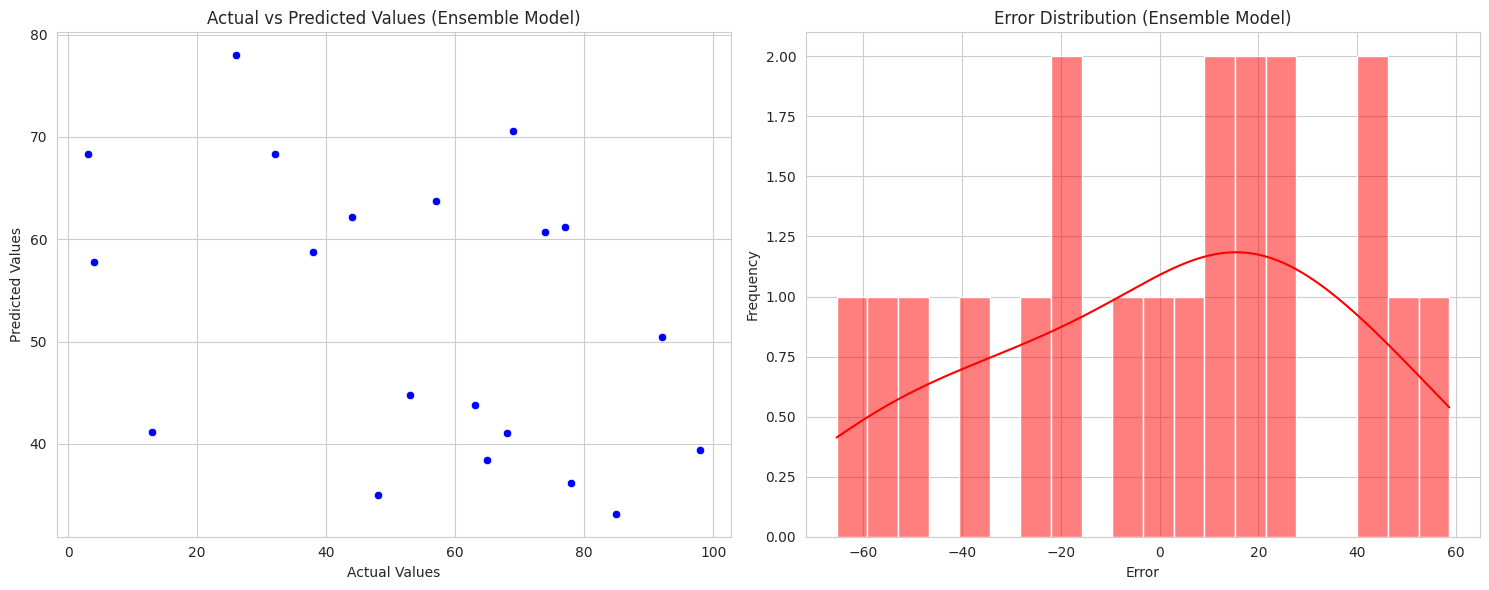

(35.249390011121335, -0.6657376168007489)

In [12]:
# Averaging the predictions of the three models to create the ensemble
ensemble_predictions = (lr_predictions + dt_predictions + rf_predictions) / 3

# Calculating RMSE and R2 scores for the ensemble model
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Creating plots for the ensemble model
plot_results(y_test, ensemble_predictions, 'Ensemble Model')

ensemble_rmse, ensemble_r2